# R results

(c) Anna-Lena Eckert

Interpreting txt files output

I implemented a logistic model on the complete datasets (not sub-divided into subject datafiles, but with a random intercept per subject) in R using the glmer from the lme package (see incremental_R.R). Here I am reading and plotting the results with Python. 

In [1]:
import os, sys, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# dataframe inspection
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Fixed effects

This is the acutally interesting part of the analysis in R: looking at average fixed effects and compare them between the visual and auditory dataset.

In [2]:
# now get fixed effects going

def get_fixed_effects_R(path): 
    
    os.chdir(path)
    res_files = glob.glob('model*.txt')

    for i in range(0,len(res_files)): 

        with open(res_files[i], 'r') as f:
            data = f.read()

        model = res_files[i].split('.')[0]
        temp = data[data.find('Fixed effects') : data.find('---')]
        start = temp.find('(Intercept)')
        fixed_effects = temp[start:data.find('---')]
        chunks = fixed_effects.split('\n')

        cols = ['coef', 'Estimate', 'Std. Error', 'z value', 'Pr(>|z|)', 'sig','model']
        
        df_fix = pd.DataFrame(columns=cols)

        for chunk in chunks:
            row = list(chunk.split(' '))
            final = [item for item in row if item != '']


            if len(final) == 7: 
                final[4:6] = [''.join(final[4:6])]

            temp = dict(zip(cols, final))
            df_fix = df_fix.append(temp, ignore_index=True)
            df_fix['model'] = model

        df_fix.to_csv('%s_FixEff.csv'%model)
        
    
    return 

In [3]:
df_fix = get_fixed_effects_R('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Logistic_Model\\results\\revision')
df_fix = pd.read_csv('model1_aud_FixEff.csv')
df_sig = df_fix[(df_fix['sig']=='***') | (df_fix['sig']=='**') | (df_fix['sig'] == '*') ]
df_fix = df_fix.drop(17)
df_fix

<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

KeyError: '[17] not found in axis'

# Visual data

In [4]:
os.chdir('C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Logistic_Model\\results\\revision')
df_fix_vis = get_fixed_effects_R(os.getcwd())
df_fix_vis = pd.read_csv('model1_vis_FixEff.csv')
df_sig_vis = df_fix_vis[(df_fix_vis['sig']=='***') | (df_fix_vis['sig']=='**') | (df_fix_vis['sig'] == '*') ]
df_fix_vis = df_fix_vis.drop(15)

<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df_fix.append(temp, ignore_index=True)
<ipython-input-2-4caf65b8a306>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [6]:
df_fix = df_fix.drop(15)

ValueError: The lengths of the data (15) and the error 16 do not match

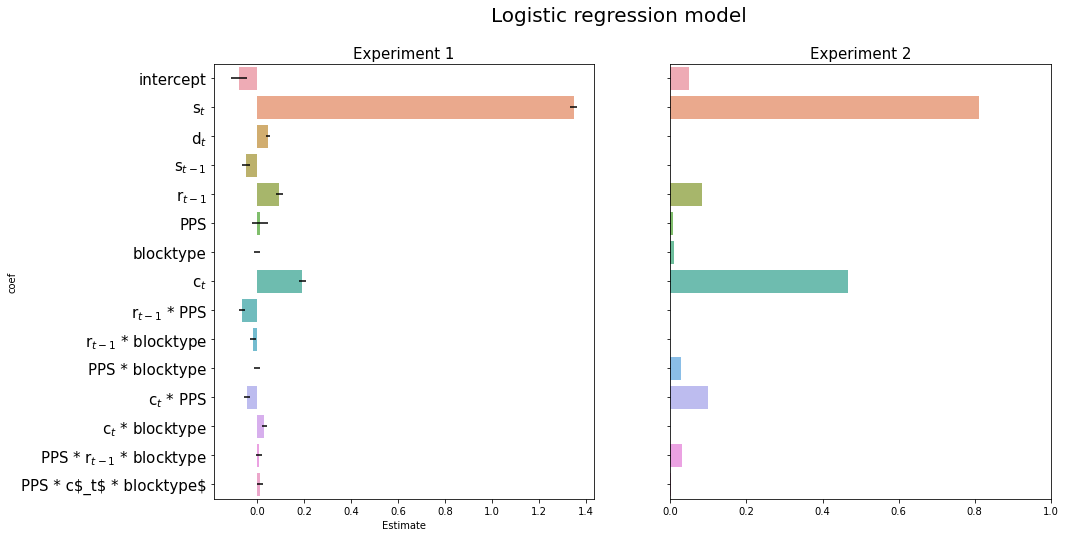

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15,8), sharey=True)

plt.suptitle('Logistic regression model', fontsize=20)

yticklabels = ['intercept', 's$_t$', 'd$_t$',
               's$_{t-1}$', 'r$_{t-1}$',
               'PPS','blocktype',
               'c$_t$',
               'r$_{t-1}$ * PPS',
               'r$_{t-1}$ * blocktype',
               'PPS * blocktype',
               'c$_t$ * PPS', 
               'c$_t$ * blocktype', 
               'PPS * r$_{t-1}$ * blocktype',
               'PPS * c$_t$ * blocktype$']

axs[0].set_title('Experiment 1', fontsize=15)
sns.barplot('Estimate','coef',data=df_fix, xerr=df_fix['Std. Error'], ax=axs[0], alpha=0.8) # color = '#0A9094'
_=axs[0].set_yticklabels(yticklabels,fontsize=15)


axs[1].set_title('Experiment 2', fontsize=15)
sns.barplot('Estimate','coef', data=df_fix_vis, xerr=df_fix_vis['Std. Error'], ax=axs[1], alpha=0.8) # , color='#D96923'
_=axs[1].set_yticklabels(yticklabels,fontsize=15)

for ax in axs: 
    ax.set_xlabel(r'$\beta$ estimate', fontsize=14)
    ax.set_ylabel(None)
    
plt.savefig('r_results.svg')

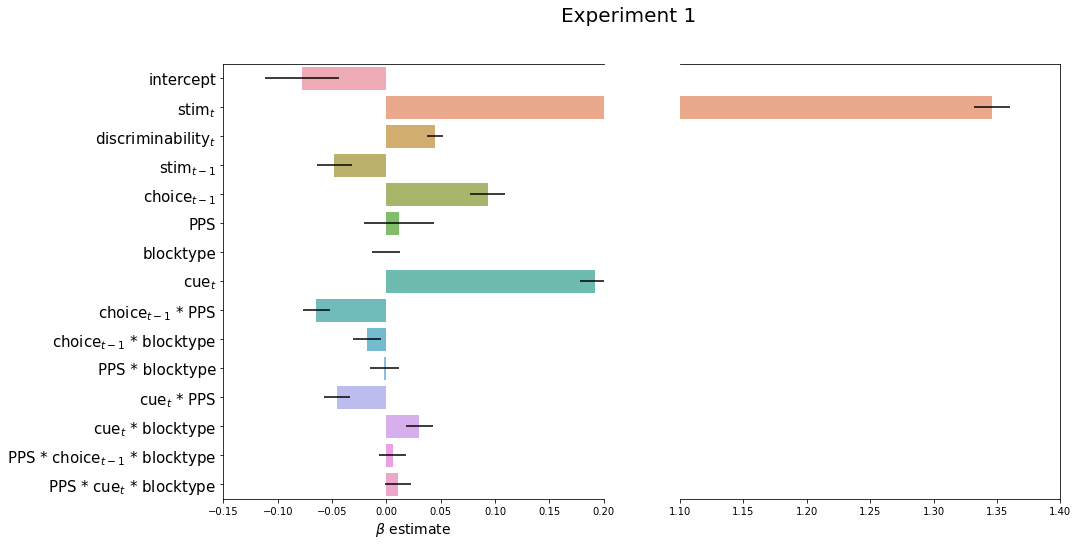

In [7]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1,2, figsize=(15,8), sharey=True)

plt.suptitle('Experiment 1', fontsize=20)

yticklabels = ['intercept', 'stim$_t$', 'discriminability$_t$',
               'stim$_{t-1}$', 'choice$_{t-1}$',
               'PPS','blocktype',
               'cue$_t$',
               'choice$_{t-1}$ * PPS',
               'choice$_{t-1}$ * blocktype',
               'PPS * blocktype',
               'cue$_t$ * PPS', 
               'cue$_t$ * blocktype', 
               'PPS * choice$_{t-1}$ * blocktype',
               'PPS * cue$_t$ * blocktype']


sns.barplot('Estimate','coef',data=df_fix, xerr=df_fix['Std. Error'], ax=axs[0], alpha=0.8) # color = '#0A9094'
_=axs[0].set_yticklabels(yticklabels,fontsize=15)
axs[0].set_xlim(-0.15, 0.2)

sns.barplot('Estimate','coef', data=df_fix, xerr=df_fix['Std. Error'], ax=axs[1], alpha=0.8) # , color='#D96923'
_=axs[1].set_yticklabels(yticklabels,fontsize=15)
axs[1].set_xlim(1.1, 1.4, 0.05)

axs[0].spines.right.set_visible(False)
axs[1].spines.left.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].xaxis.tick_bottom()

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(1.4))

 
axs[0].set_xlabel(r'$\beta$ estimate', fontsize=14)
axs[0].set_ylabel(None)
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)
    
plt.savefig('r_results_exp1.svg')

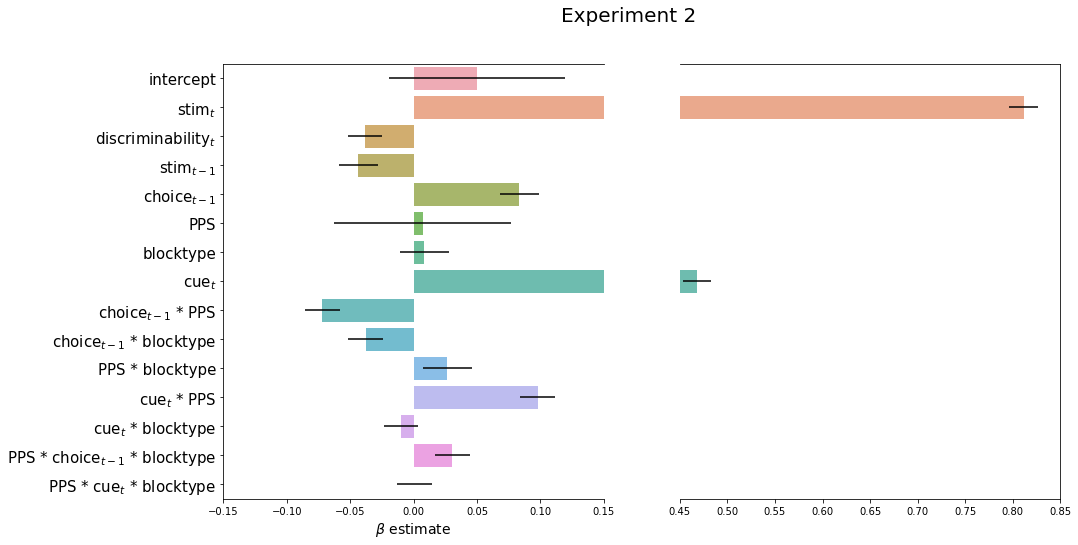

In [8]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1,2, figsize=(15,8), sharey=True)

plt.suptitle('Experiment 2', fontsize=20)

yticklabels = ['intercept', 'stim$_t$', 'discriminability$_t$',
               'stim$_{t-1}$', 'choice$_{t-1}$',
               'PPS','blocktype',
               'cue$_t$',
               'choice$_{t-1}$ * PPS',
               'choice$_{t-1}$ * blocktype',
               'PPS * blocktype',
               'cue$_t$ * PPS', 
               'cue$_t$ * blocktype', 
               'PPS * choice$_{t-1}$ * blocktype',
               'PPS * cue$_t$ * blocktype']


sns.barplot('Estimate','coef',data=df_fix_vis, xerr=df_fix_vis['Std. Error'], ax=axs[0], alpha=0.8) # color = '#0A9094'
_=axs[0].set_yticklabels(yticklabels,fontsize=15)
axs[0].set_xlim(-0.15, 0.15)

sns.barplot('Estimate','coef', data=df_fix_vis, xerr=df_fix_vis['Std. Error'], ax=axs[1], alpha=0.8) # , color='#D96923'
_=axs[1].set_yticklabels(yticklabels,fontsize=15)
axs[1].set_xlim(0.45, 0.85)

axs[0].spines.right.set_visible(False)
axs[1].spines.left.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].xaxis.tick_bottom()

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.8))

 
axs[0].set_xlabel(r'$\beta$ estimate', fontsize=14)
axs[0].set_ylabel(None)
axs[1].set_ylabel(None)
axs[1].set_xlabel(None)
    
plt.savefig('r_results_exp2.svg')

In [34]:
os.getcwd()

'C:\\Users\\annae\\Desktop\\ChoiceHistory_Psych\\Logistic_Model\\results\\revision'

In [36]:
df_fix_vis

,Unnamed: 0,coef,Estimate,Std. Error,z value,Pr(>|z|),sig,model
0,0,(Intercept),0.050044,0.069518,0.720,0.47160,NaN,model1_vis
1,1,target_z,0.811637,0.015142,53.600,<2e-16,***,model1_vis
2,2,coherence_z,-0.038334,0.013244,-2.894,0.00380,**,model1_vis
3,3,stim_1_z,-0.043430,0.015440,-2.813,0.00491,**,model1_vis
4,4,resp_1_z,0.083531,0.015112,5.527,3.25e-08,***,model1_vis
5,5,PPS_z,0.007052,0.070094,0.101,0.91986,NaN,model1_vis
6,6,block_type_z,0.008358,0.019262,0.434,0.66435,NaN,model1_vis
7,7,cue_z,0.468098,0.014373,32.568,<2e-16,***,model1_vis
8,8,resp_1_z:PPS_z,-0.071892,0.013721,-5.239,1.61e-07,***,model1_vis
9,9,resp_1_z:block_type_z,-0.037844,0.013516,-2.800,0.00511,**,model1_vis
